In [1]:
using Turing
using Plots
using StatsPlots

┌ Info: Found initial step size
└   ϵ = 3.2


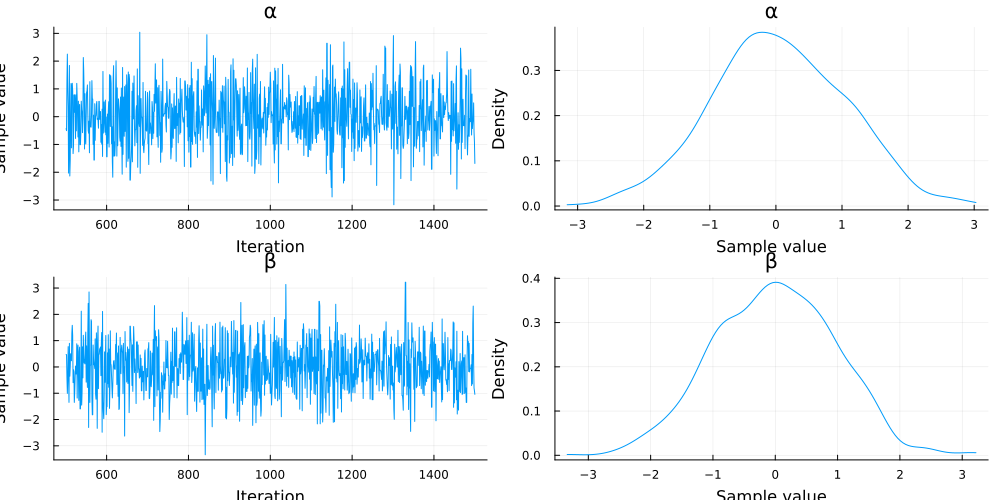

In [2]:

# Generate synthetic data
function generate_ar_data(order, n)
    x = randn(n)
    for i in order+1:n
        x[i] = 0.6 * x[i-1] + 0.3 * x[i-2] + randn()
    end
    return x
end

order = 2
n = 100
data = generate_ar_data(order, n)

# Define the AR model
@model function ar_model(x)
    order = length(x)
    
    # Priors on AR coefficients
    α ~ Normal(0, 1)
    β ~ Normal(0, 1)
    
    # Likelihood
    for i in order+1:length(x)
        μ = α * x[i-1] + β * x[i-2]
        x[i] ~ Normal(μ, 1)  # Assuming unit variance for simplicity
    end
end

# Perform Bayesian inference
chain = sample(ar_model(data), NUTS(), 1000)

# Plot the results
plot(chain)


In [3]:
include("operations.jl")

sum (generic function with 33 methods)

In [8]:
λ = [2.0, 3.0, 4.0, 5.0, 6.0]

# Calculate geometric mean using logarithmic form
X̄ᵧₑₒₘ = exp(∑(log.(λ)) / length(λ))

println("Geometric Mean: ", X̄ᵧₑₒₘ)


Geometric Mean: 3.7279192731913513


In [12]:
λ = [2.0, 3.0, 4.0, 5.0, 6.0]

# Calculate geometric mean
X̄ᵧₑₒₘ = Π(λ)^(1/length(λ))

println("Geometric Mean: X̄ᵧₑₒₘ  = ", X̄ᵧₑₒₘ)


Geometric Mean: X̄ᵧₑₒₘ  = 3.7279192731913517
